Identifying drilling activity in .LAS data. The data given is missing the following:
* BONB (the bit on bottom flag)
* HDTH (the hole depth)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('run_3.csv', parse_dates=[23], header=0)

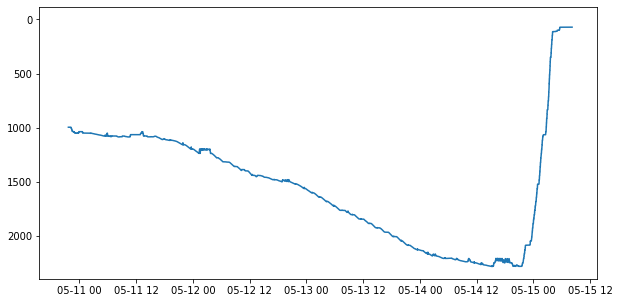

In [27]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [10, 5]
ax.plot(df['DateTime'], df['DEPT'])
ax.invert_yaxis()


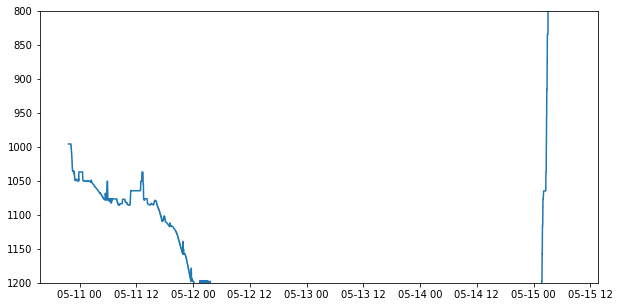

In [29]:
#Ok so it looks like the run start depth is around 1000 meters. I'll zoom in and take a closer look.
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [10, 5]
ax.plot(df['DateTime'], df['DEPT'])
ax.set_ylim(800,1200)
ax.invert_yaxis()

### Ok so it looks like the depth where they started drilling was exactly 1050 meters. I will set that as the start depth for calculating the hole depth.



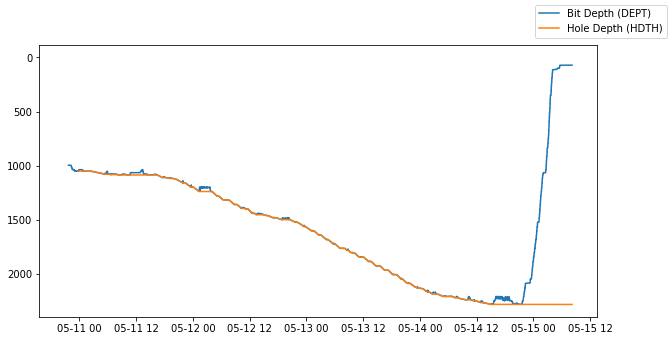

In [53]:
#I was about to write my own function to calculate the hole depth, but then I realized that the Cumulative Maximum value
#is exactly what we need.
df['HDTH'] = df['DEPT'].cummax()

#Set the starting hole depth. This avoids creating any false drilling during the trip in.
import numpy as np
startdepth = 1050
df['HDTH'] = df['HDTH'].apply(lambda x: x if (x > startdepth) else np.nan)


fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [10, 5]
ax.plot(df['DateTime'], df['DEPT'], label='Bit Depth (DEPT)')
ax.plot(df['DateTime'], df['HDTH'], label='Hole Depth (HDTH)')
ax.invert_yaxis()
fig.legend()

Now we can easily see where the bit is off bottom, but let's generate a flag for that and then we can make the drilling flag.

In [49]:
#create the drilling flag column
#If bit on bottom, BONB = 0
#If bit off bottom, BONB = 1


df['BONB'] = df['HDTH'] - df['DEPT']
df['BONB'].apply(lambda x: 0 if (x < 0.5) else 1)



0        1
1        1
2        1
3        1
4        1
        ..
39408    1
39409    1
39410    1
39411    1
39412    1
Name: BONB, Length: 39413, dtype: int64

In [63]:
#Now let's create the drilling flag

def are_we_drilling(bonb, tflo, rpm):
    if (bonb == 0) and (tflo > 20) and rpm > (20):
        return 1
    else:
        return 0
df.columns
df['DRILLING_FLAG'] = df.apply(lambda x: are_we_drilling(x['BONB'], x['TFLO'], x['RPM']), axis=1)

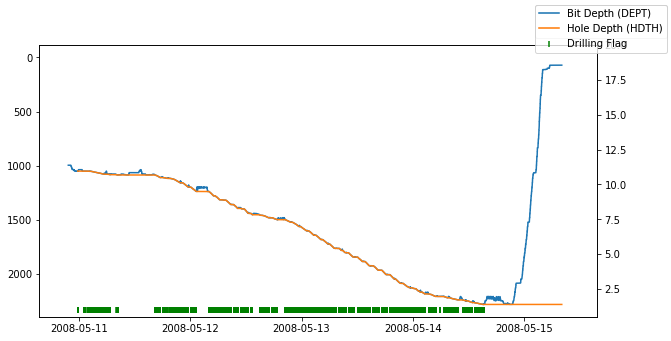

In [80]:
#Plot the data again
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [10, 5]
ax.plot(df['DateTime'], df['DEPT'], label='Bit Depth (DEPT)')
ax.plot(df['DateTime'], df['HDTH'], label='Hole Depth (HDTH)')
ax.invert_yaxis()
fig.legend()
ax1 = ax.twinx()
ax1.scatter(df['DateTime'], df['DRILLING_FLAG'], marker='|', color='green', label='Drilling Flag')
ax1.set_ylim(0.5,20)
fig.legend()
